Baseline Logistic regression with different sampling

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('../2_Data_Clean/hr/train_data.csv')

In [3]:
X = train_data.drop(["Class"], axis = 1)
y = train_data['Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,random_state = 7)

In [7]:
from imblearn.over_sampling import RandomOverSampler 

In [8]:
ros = RandomOverSampler(random_state = 7)

In [9]:
x_resampled, y_resampled = ros.fit_sample(X_train,y_train)

In [10]:
from sklearn.linear_model import LogisticRegression 

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon

In [12]:

pipe = make_pipeline(StandardScaler(),LogisticRegression())
param_grid = {
    "logisticregression__C": expon(scale=2),
    "logisticregression__penalty": ['l1','l2']
}


random_cv = RandomizedSearchCV(pipe,param_grid, cv = 10, n_jobs = 2,
                               n_iter = 10 , error_score = 0, 
                               return_train_score=True, scoring = 'f1')


In [13]:
x_resampled.shape

(318430, 31)

In [14]:
X_train.shape

(159491, 31)

In [16]:
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0c0d4e0358>, 'logisticregression__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

In [17]:
y_pred = random_cv.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_true = y_test, y_pred = y_pred)

array([[39797,     7],
       [   33,    36]])

In [20]:
print("The total time used is {} hrs.".format(random_cv.cv_results_['mean_fit_time'].sum()*10/3600))

The total time used is 0.12799518790509964 hrs.


In [21]:
random_cv.best_params_

{'logisticregression__C': 1.6877306305705477,
 'logisticregression__penalty': 'l2'}

In [22]:
random_cv.best_score_

0.6941044250661876

## The best Logistic regression gives a F1 score of 0.694.

This is the hyperparameter:
1. 'logisticregression__C': 1.6877306305705477,
2. 'logisticregression__penalty': 'l2'

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(33,0.5,'True values')

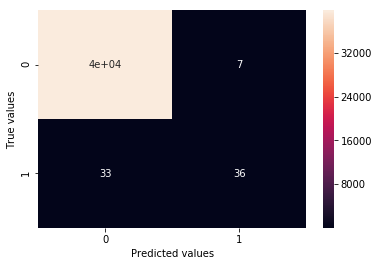

In [27]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), annot = True)
plt.xlabel("Predicted values")
plt.ylabel("True values")